In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from scipy import stats

In [6]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns

### Load the CSV File and Explore the Data

Before starting the data cleaning process, it's essential to first understand the dataset. This involves getting familiar with the data's context, interpreting the meaning of each value, and identifying potential issues that could arise during the cleaning process. Having a clear understanding of the data will help you select the most appropriate cleaning methods and avoid common pitfalls or errors down the line.

In [ ]:
## Data Loading

In this step, we load the dataset from a CSV file using the `pandas` library.
This allows us to import the data into a DataFrame, which is a tabular structure that we can work with for further analysis and cleaning.

### Loading the CSV File

To load the dataset, we use the `pd.read_csv()` function. This function reads the CSV file and converts it into a DataFrame.
We will also inspect the first few rows to get an overview of the data structure.

In [8]:
# Create a DataFrame from CSV file
df = pd.read_csv('Downloads/AB_NYC_2019.csv')

# First 5 rows of the DataFrame
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
# The summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From the output, we observe that the DataFrame consists of 48,895 rows (entries) and 16 columns. These columns contain a variety of data types, such as `int64`, `float64`, and `object`. Additionally, we notice that certain columns, including 'name', 'host_name', 'last_review', and 'reviews_per_month', have missing values. This is evident from the difference between the total number of rows (48,895) and the number of non-null entries in these specific columns.

### Data Types

We notice that the 'last_review' column contains date values, but its data type is currently set to `object`. To facilitate date-related operations, we need to convert this column to the `datetime` data type. This will enable us to perform various date-based calculations and analyses more effectively.

In [10]:
df['last_review'] = pd.to_datetime(df['last_review'])

### Categorical Variables

The columns 'neighbourhood_group', 'neighbourhood', and 'room_type' are categorical in nature. To optimize memory usage and improve performance, it would be more efficient to convert these columns from the `object` data type to the `category` data type.

In [11]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')

### Unique Categories in Categorical Columns

Next, let's take a look at the unique categories present in the 'neighbourhood_group', 'neighbourhood', and 'room_type' columns:

In [12]:
df['neighbourhood_group'].values

['Brooklyn', 'Manhattan', 'Manhattan', 'Brooklyn', 'Manhattan', ..., 'Brooklyn', 'Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan']
Length: 48895
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [13]:
# Check the data types
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

### Duplicates

Having duplicate rows in your dataset can negatively impact your analysis by overemphasizing certain data points, biasing statistical measures, and creating misleading conclusions about the data.

In [14]:
df.duplicated().sum()

0

### No Duplicates

The DataFrame does not contain any duplicate rows.

### Missing Data

Missing data can lead to issues like biased outcomes, inaccurate statistical conclusions, and potential errors in machine learning models. Identifying missing values allows you to choose the best strategy for dealing with them, whether that involves imputing the missing values or removing the rows containing them.

In [15]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Missing Data

The dataset contains missing values in four columns: 'name', 'host_name', 'last_review', and 'reviews_per_month'.

There are several techniques available for handling missing data:

- **Deletion**: One option is to remove the rows or columns containing missing values. This approach is appropriate when the amount of missing data is minimal and does not hold significant value for the analysis.

- **Imputation**: Missing values can be replaced with estimated values. Common strategies include filling missing entries with the mean, median, or mode of the column. More advanced techniques, like regression models or machine learning algorithms, can also be used to predict the missing data.

- **Interpolation**: This method estimates missing values based on surrounding data points. It is particularly useful in time series data, where you can estimate missing values by considering the trends in neighboring observations.

- **Data Augmentation**: This technique involves generating new data points based on existing data. This can be done through statistical methods or machine learning algorithms to create additional synthetic data that helps to fill in missing values.

### Handling Missing Data in 'name' Column

Given that the 'name' column is not significant for future analysis, we can replace its missing values with a placeholder such as 'N/A'. This ensures consistency in the dataset without affecting the integrity of our analysis.

```python
# Replace missing values in the 'name' column with 'N/A'
df['name'].fillna('N/A', inplace=True)

In [16]:
df.fillna({'name': 'N/A'}, inplace=True)


### Handling 'host_name' and 'last_review' Columns

- The **'host_name'** column is irrelevant for our analysis, as it contains the names of the hosts, which do not contribute to the insights we're looking for. Therefore, we can safely remove this column from the dataset.

In [17]:
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


It is common practice to drop the **'id'** column during the data cleaning process. The 'id' column typically serves as a unique identifier for each row but does not contribute meaningful insights for analysis. As a result, it is often removed to streamline the dataset and focus on the more relevant variables.

### Handling Missing Values in 'reviews_per_month'

The **'reviews_per_month'** column indicates the average number of reviews an item receives per month. If a value is missing, it suggests that the item has received no reviews at all. Therefore, we can impute the missing values by assigning a value of **0**, representing zero reviews per month.

In [18]:
df.fillna({'reviews_per_month': 0}, inplace=True)

In [19]:
df.isnull().sum()


name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Missing Values Handled

At this point, we have addressed the issue of missing values in the dataset. The missing entries have been appropriately handled by imputing values where necessary and removing irrelevant columns, ensuring that the data is now complete and ready for further analysis.

### Outliers

Outliers are data points that significantly differ from the majority of the other values in a dataset. These values can be much higher or lower than the rest, and if left unchecked, they can skew the overall analysis, leading to misleading conclusions.

Several techniques can be used to detect outliers, including visual methods like **boxplots** and **scatterplots**, as well as statistical methods such as the **z-score** or **interquartile range (IQR)**. Once outliers are identified, they can be handled in different ways: by removing them, adjusting them to more reasonable values, or treating them as a separate category for further analysis.

In [20]:
# Statistics of the numerical columns in the DataFrame
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Observations on Potential Outliers

Based on the output, we observe the following potential outliers in the dataset:

- **'price'**: The minimum value is 0, which is unusual, and the maximum price is 10,000, significantly higher than the 75th percentile. Additionally, the column has a high standard deviation, suggesting variability in the data.
- **'minimum_nights'**: The maximum value of 1,250 is much higher than the 75th percentile, which could indicate the presence of outliers.
- **'number_of_reviews'**: The maximum value of 629 is far above the 75th percentile, signaling a possible outlier.
- **'reviews_per_month'**: A maximum of 58.5 reviews per month is much higher than the 75th percentile, which may point to an outlier.
- **'calculated_host_listings_count'**: With a maximum value of 327, which is substantially higher than the 75th percentile, this column may also contain outliers.

These observations suggest that there may be outliers in these columns, and it is crucial to investigate further. We need to determine if these values should be treated as genuine data points, adjusted, or removed in order to avoid distorting the analysis.

In [21]:
outlier_cols = [
    'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count'
]

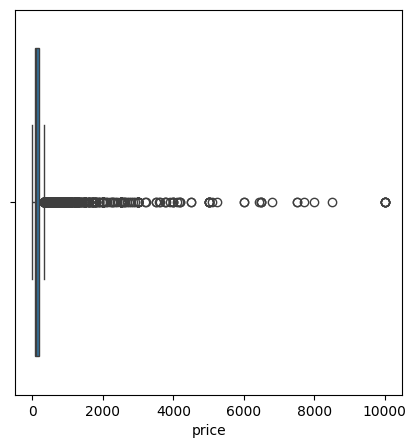

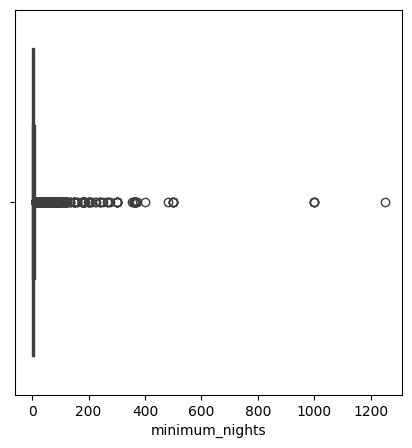

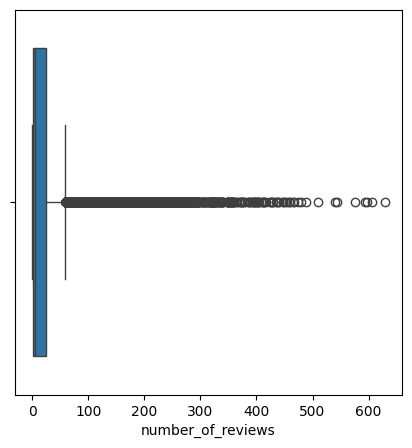

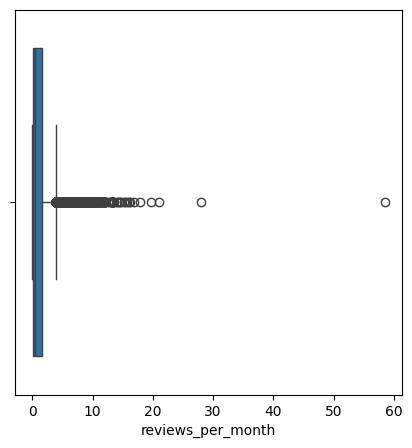

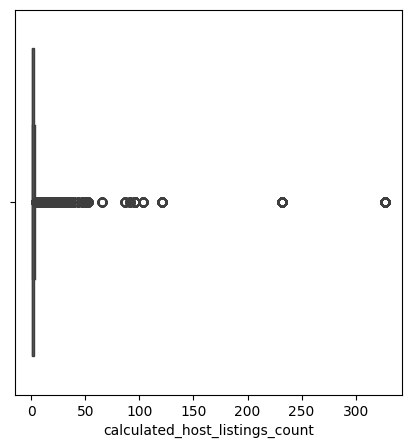

In [22]:
for col in outlier_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[col])
    plt.show()

### Confirmation of Outliers

Upon further investigation, it is clear that outliers are present in all of the columns mentioned:

- **'price'**
- **'minimum_nights'**
- **'number_of_reviews'**
- **'reviews_per_month'**
- **'calculated_host_listings_count'**

These outliers need to be addressed in the data cleaning process to ensure the accuracy and reliability of any subsequent analysis.

### Z-Score Method for Detecting Outliers

Another effective method for detecting outliers is the **Z-score**, which calculates how many standard deviations a data point is from the mean. If a data point falls outside a specified threshold (commonly beyond 3 standard deviations from the mean), it is considered an outlier.

We can apply this method to identify outliers in all numerical columns of the dataset.

In [23]:
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

for col in df_numeric.columns:
    # Calculate z-score of the column
    z_score = np.abs(stats.zscore(df[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

latitude: 99
longitude: 1236
price: 388
minimum_nights: 327
number_of_reviews: 1221
reviews_per_month: 847
calculated_host_listings_count: 680


### Insights from the Z-Score Method

Using the Z-score method, we were able to identify outliers that were not apparent when simply examining the summary statistics in the `describe()` table. This highlights the value of applying multiple techniques for detecting outliers to ensure a more comprehensive analysis of the data.

In [24]:
sns.boxplot(x=df['latitude']);  plt.show();

In [25]:
sns.boxplot(x=df['longitude']); plt.show();

### Handling Outliers

There are several approaches to address outliers in a dataset:

- **Remove the outliers**: One option is to remove rows containing outliers. However, this may result in the loss of valuable data and potentially reduce the accuracy of your model. It's important to carefully assess whether removing outliers is justified and ensures that it won't compromise the analysis.

- **Replace the outliers**: Another approach is to replace outliers with more reasonable values, such as the mean, median, or mode of the column. This helps maintain the integrity of the dataset while mitigating the impact of extreme values.

- **Transform the data**: Data transformation techniques, such as **log transformation** or **Box-Cox transformation**, can be applied to reduce the effect of outliers. These methods also improve the overall distribution of the data, making it more suitable for analysis.

### Using the Z-Score Method to Remove Outliers

We can apply the **Z-score method** to identify and remove outliers from the dataset. By calculating the Z-score for each data point, we can determine which values are more than a certain number of standard deviations away from the mean (typically, a Z-score above 3 or below -3). These values can then be removed from the dataset to ensure that extreme outliers do not skew the analysis.


In [26]:
z_scores = np.abs(stats.zscore(df_numeric))

# DataFrame without outliers
df_wo_outliers = df[(z_scores < 3).all(axis=1)]
df_wo_outliers.shape

(44475, 13)

### Conclusion

We've covered the key steps in data cleaning, including identifying and handling duplicates, dealing with missing values, and detecting and managing outliers. By following these steps, you can ensure that your dataset is clean, consistent, and ready for analysis.

Thank you for reading! I hope this guide has been both informative and helpful in understanding the fundamentals of data cleaning.